

> The project implemented is the data visualization of US Accidents dataset, that is available in Kaggle. 
The project was implemented with python and libraries such as pandas, seaborn,matplotlib,folium.



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import os
import datetime as dt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df= pd.read_csv('/content/US_Accidents_Dec19.csv')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

The code cells below indicate data preprocessing


In [0]:
df['Start_Time']= pd.to_datetime(df.Start_Time)

In [0]:
df['year']=df['Start_Time'].dt.year
df['month']=df['Start_Time'].dt.month
df['day']=df['Start_Time'].dt.day
df['hour']=df['Start_Time'].dt.hour
df['minute']=df['Start_Time'].dt.minute
df['weekday']=df.Start_Time.dt.dayofweek

In [0]:
df_new=df
df_new['month_year'] = pd.to_datetime(df['Start_Time']).dt.to_period('M')

In [0]:
df_new.head(5)
df_new['count']=1
df_timeseries = pd.DataFrame(df_new[['month_year','count']].groupby(['month_year']).sum().reset_index('month_year').values.tolist())

In [0]:
df_new.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,year,month,day,hour,minute,weekday,month_year,count
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2,8,5,46,0,2016-02,1
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016,2,8,6,7,0,2016-02,1
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,2016,2,8,6,49,0,2016-02,1
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,2016,2,8,7,23,0,2016-02,1
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,2016,2,8,7,39,0,2016-02,1


In [0]:
df.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


Severity of accidents in USA- Severity is represented in 4 levels, with severity 1 indicated low impact on traffic, Severity 4 indicating high impact on traffic.

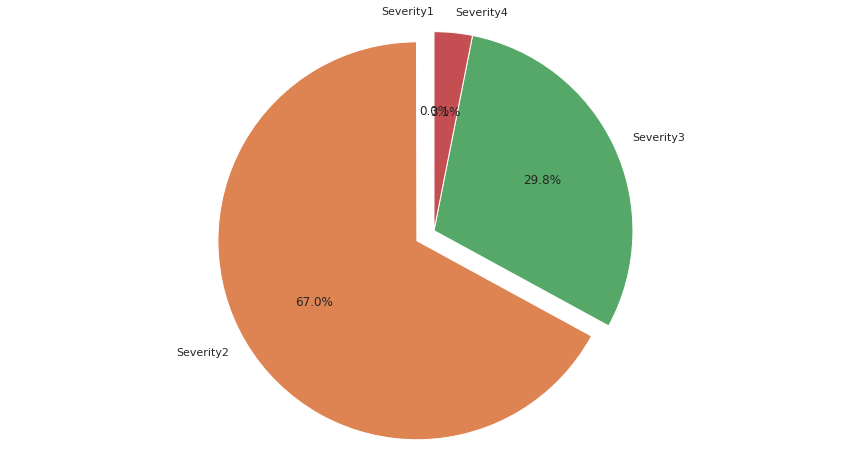

<Figure size 1080x576 with 0 Axes>

In [0]:
df_copy= df
df_copy['count']=1
df_severity=df_copy.groupby(['Severity']).sum()
labels = ['Severity1', 'Severity2', 'Severity3', 'Severity4']
sizes = df_severity['count']
explode = (0, 0.1, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal') 
plt.figure(figsize=(15,8)) 
plt.show()


In [0]:
from folium.plugins import HeatMap
df_copy= df
df_copy['count']=1
base_map=folium.Map(location=[48, -102],control_scale = True, zoom_start =4)
HeatMap(data = df_copy[['Start_Lat','Start_Lng','count']].groupby(['Start_Lat','Start_Lng']).sum().reset_index().values.tolist(),radius =15).add_to(base_map)

In [0]:
base_map

The figure below indicates Accidents in USA from 2016 to 2019 with indication of Severity levels. We see that Severity 2 type accidents has been increasing over the years

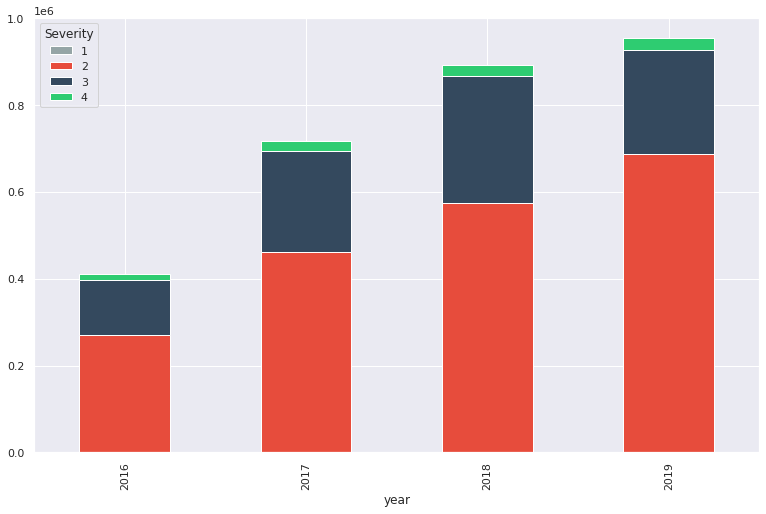

In [0]:
df_new7 = df
df_new7['count']=1

table2 = pd.pivot_table(df_new7, columns = ['Severity'], values='count',index=['year'],aggfunc = np.sum,fill_value=0)
table2
colors = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

table2.loc[[2016,2017,2018,2019]].plot.bar(stacked=True, color=colors, figsize=(13,8))

The figure below indicates top 10 states in USA with highest accidents. Since each state may rquire different traffic measures, it is important to analyze their severity levels of accidents. Hence the severity levels are also indicated.

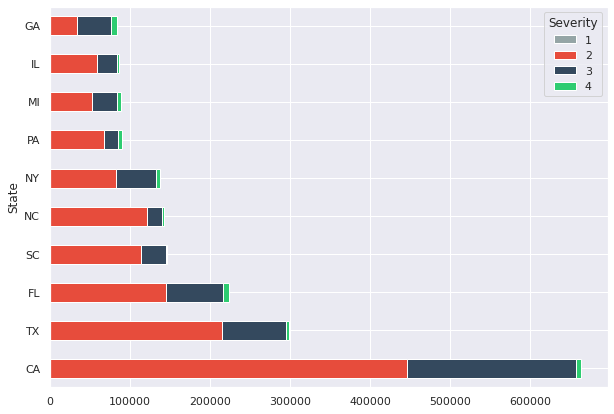

In [0]:
df_new7 = df
df_new7['count']=1
table1 = pd.pivot_table(df_new7, columns = ['Severity'], values='count',index=['State'],aggfunc = np.sum,fill_value=0)
table1
colors = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
table1.loc[['CA','TX','FL','SC','NC','NY','PA','MI','IL','GA']].plot.barh(stacked=True, color=colors, figsize=(10,7))

The figure below indicates top 10 cities in USA with highest accidents. Since each city may rquire different traffic measures, it is important to analyze their severity levels of accidents. Hence the severity levels are also indicated.

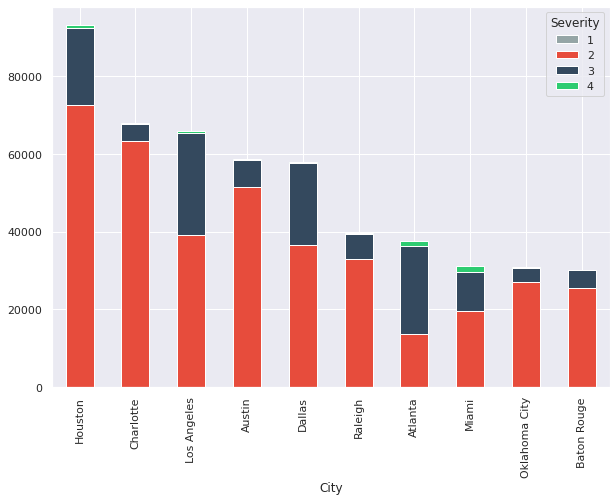

In [0]:
df_new4 = df
df_new4['count']=1

table = pd.pivot_table(df_new4, columns = ['Severity'], values='count',index=['City'],aggfunc = np.sum,fill_value=0)
table
colors = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
table.loc[['Houston','Charlotte','Los Angeles','Austin','Dallas','Raleigh','Atlanta','Miami','Oklahoma City','Baton Rouge']].plot.bar(stacked=True, color=colors, figsize=(10,7))

The figure below indicates the severity levels and their trends over the years. It shows that severity 3 and 4 accidents are quite consistent over the years, however severity 2 type accidents are increasing over the years.

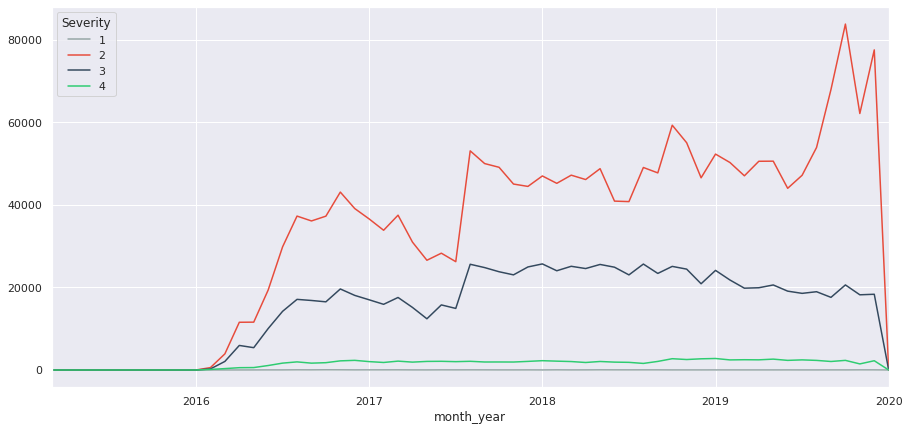

In [0]:
df_new8=df
df_new8['month_year'] = pd.to_datetime(df['Start_Time']).dt.to_period('M')
df_new8['count']=1

table5 = pd.pivot_table(df_new8, columns = ['Severity'], values='count',index=['month_year'],aggfunc = np.sum,fill_value=0)
table5
colors = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
table5.loc[:,[1,2,3,4]].plot.line(color=colors, figsize=(15,7))

The heatmap below gives a pattern of the accidents on a given weekday and hour of the day. It can be seen that the heatmap is more correlated along the weekdays with most accidents and also most of the accidents between rush hours namely 7 to 9 and evening 4 to 6.
An expansion of the same has been implemented with bar chart of accident count on days of the week and the hours separately


([<matplotlib.axis.YTick at 0x7f53d0eed198>,
 [Text(0, 0.5, 'Mon'),
  Text(0, 1.5, 'Tue'),
  Text(0, 2.5, 'Wed'),
  Text(0, 3.5, 'Thu'),
  Text(0, 4.5, 'Fri'),
  Text(0, 5.5, 'Sat'),
  Text(0, 6.5, 'Sun')])

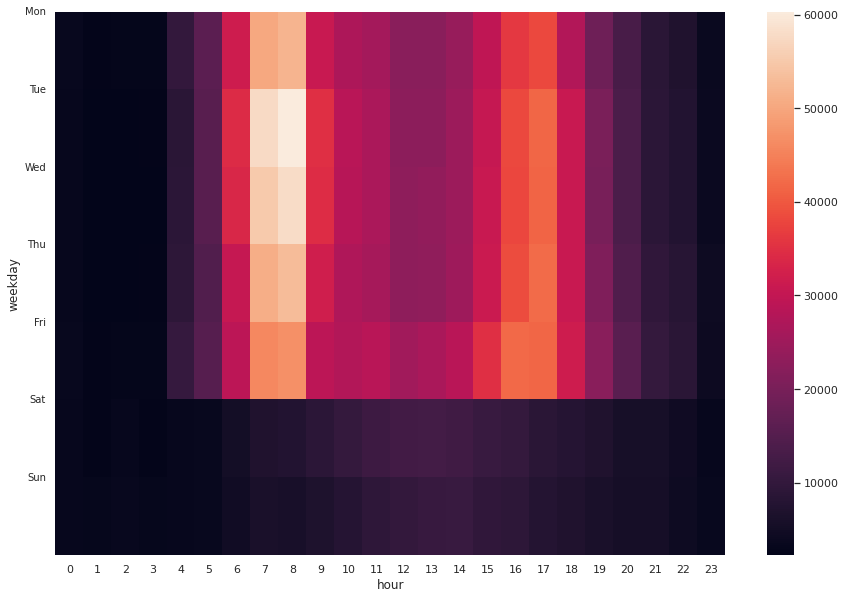

In [0]:
df_copy= df
df_copy['count']=1
df_heatmap = df_copy[['weekday','hour','count']].groupby(['weekday','hour']).sum().reset_index().values.tolist()
df_heatmap = pd.DataFrame(df_heatmap)
df_heatmap.head(5)
df_heatmap2 = df_heatmap.rename(columns={0: 'weekday', 1: 'hour',2:'count'})
df_heatmap2
heatmap_df = pd.pivot_table(df_heatmap2, values='count', index=['weekday'], columns='hour')
heatmap_df.head(3)
plt.figure(figsize=(15,10))	
g=sns.heatmap(heatmap_df)
plt.yticks(np.arange(7),('Mon','Tue','Wed','Thu','Fri','Sat','Sun'), rotation=0, fontsize="10", va="center")

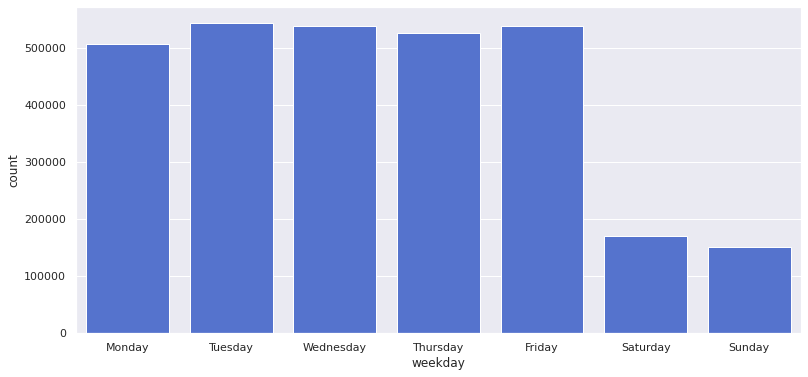

In [0]:

sns.countplot(x="weekday",data =df_week,color='royalblue')
sns.set(rc={'figure.figsize':(13,6)})

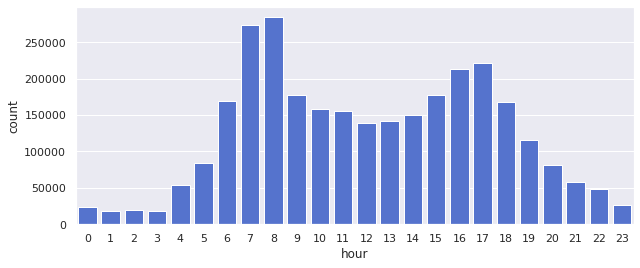

In [0]:
sns.countplot(x="hour",data =df,color = 'royalblue')
sns.set(rc={'figure.figsize':(10,4)})

Top 10 zipcodes in USA with most accidents

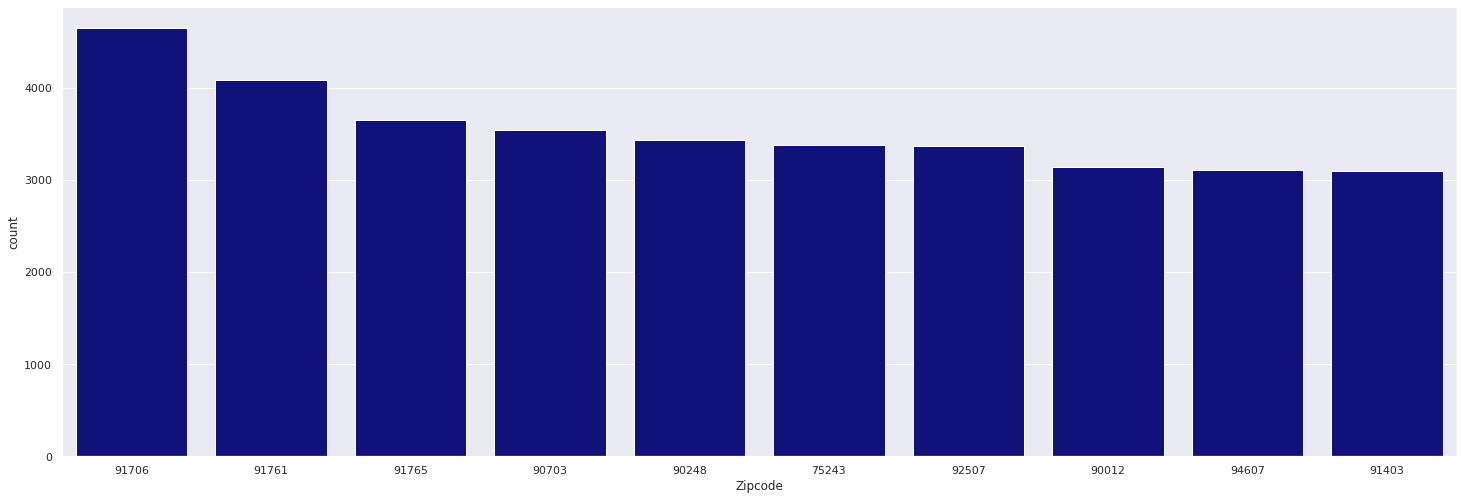

In [0]:
sns.countplot(x="Zipcode",data = df,order=pd.value_counts(df['Zipcode']).iloc[:10].index,color='darkblue')
sns.set(rc={'figure.figsize':(25,8.27)})

The code below is for a heatmap on the USA map using folium to indicate locations that have the highest accident density. Color levels are green, yellow, red. Red indicates high number of accidents, Orange medium, and Yellow lower number of accidents. Since the execution overloaded and crashed google chrome, the output has been saved as a html file, that will e saved on the Google colab folder to the left pane on the name. map-fin1.html. A marker has been enabled to mark the possible locations for consideration regarding traffic/accident measures. One of the reasons for the higher density along the west and east coast could be because of the highways concentration namely I45 ,I95 and others.

In [0]:
import folium
from folium.plugins import HeatMap
df_copy= df
df_copy['count']=1
base_map=folium.Map(location=[48, -102],control_scale = True, zoom_start =4)
HeatMap(gradient = {0.4: 'yellow', 0.65: 'orange', 1: 'red'},data = df_copy[['Start_Lat','Start_Lng','count']].groupby(['Start_Lat','Start_Lng']).sum().reset_index().values.tolist(),radius =10).add_to(base_map)
basemap = base_map.add_child(folium.ClickForMarker(popup='Potential Location'))
import branca

colormap = branca.colormap.linear.YlOrRd_09.scale(0, 3000000)
colormap = colormap.to_step(index=[0, 500000, 1000000,1500000,2000000,2500000, 3000000])
colormap.caption = 'Accidents in USA from 2016 to 2019'
colormap.add_to(base_map)
base_map.save('map-fin1.html')

The figures below are time series trends to understand if there is a repetitive pattern in terms of accidents. It was found that most accidents occurred between July and November.
The preprocessing for this is also included below.

In [0]:
df_new=df
df_new['month_year'] = pd.to_datetime(df['Start_Time']).dt.to_period('M')
df_new.head(5)
df_new['count']=1
df_timeseries = pd.DataFrame(df_new[['month_year','count']].groupby(['month_year']).sum().reset_index('month_year').values.tolist())
df_timeseries = df_timeseries.rename(columns={0: 'month_year',1:'count'})


In [0]:
df_timeseries.head(5)
df_timeseries1 = df_timeseries.set_index('month_year')
df_timeseries1.head(5)

,count
month_year,
2015-03,1
2016-01,7
2016-02,985
2016-03,6329
2016-04,18088


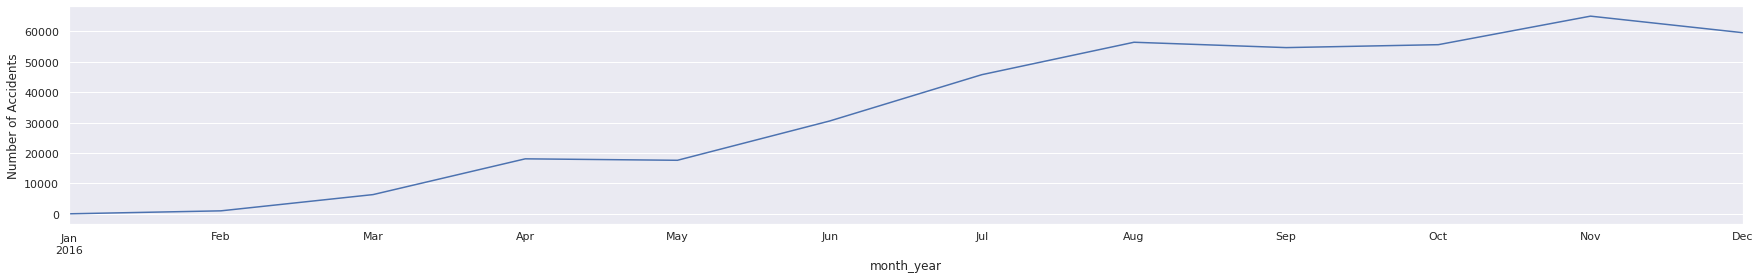

In [0]:
ax = df_timeseries1.loc['2016-01':'2016-12', 'count'].plot(linestyle='-')
ax.set_ylabel('Number of Accidents');

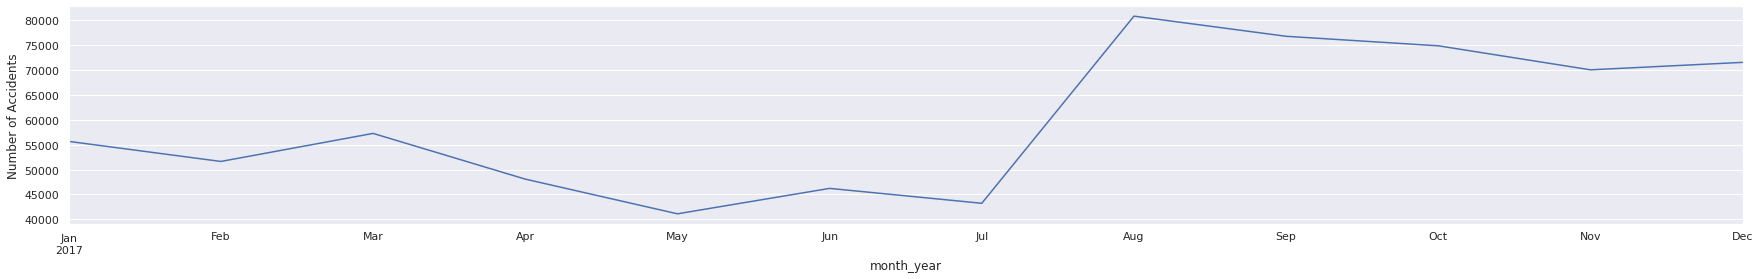

In [0]:
ax = df_timeseries1.loc['2017-01':'2017-12', 'count'].plot( linestyle='-')
ax.set_ylabel('Number of Accidents');

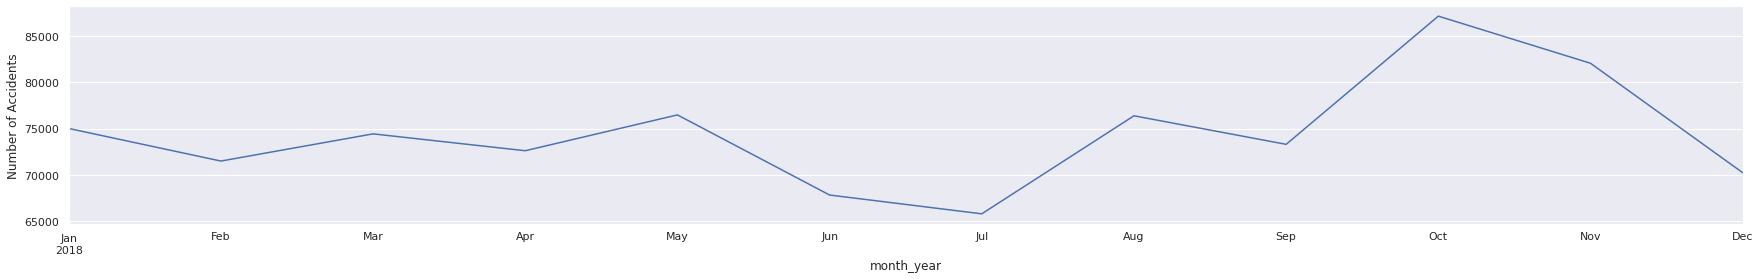

In [0]:
ax = df_timeseries1.loc['2018-01':'2018-12', 'count'].plot( linestyle='-')
ax.set_ylabel('Number of Accidents');

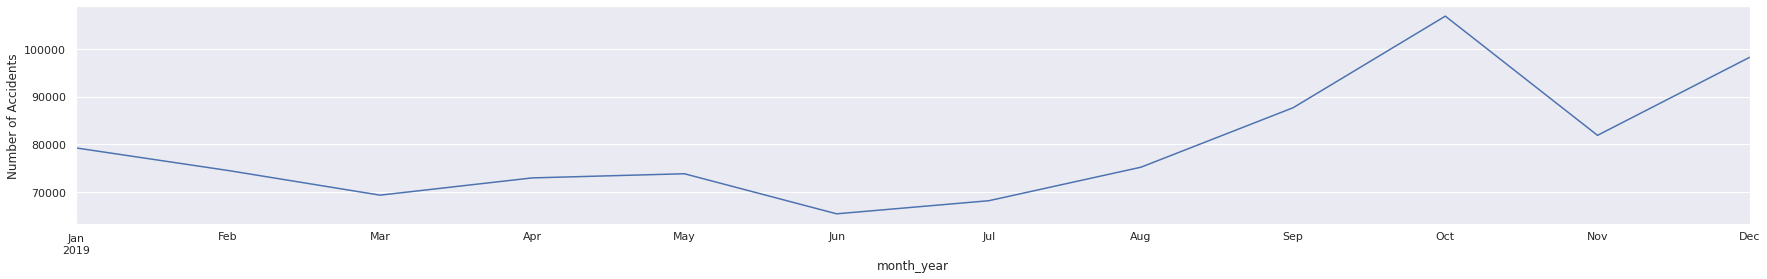

In [0]:
ax = df_timeseries1.loc['2019-01':'2019-12', 'count'].plot(linestyle='-')
ax.set_ylabel('Number of Accidents');

The figures below are to understand if there was a junction, crossing, exit, round about, bump, railway closer to the point of accidents. The data indicated that most accidents did not occur close to these point of interests.

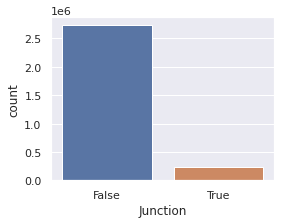

In [0]:
sns.countplot(x="Junction",data =df)
sns.set(rc={'figure.figsize':(4,3)})


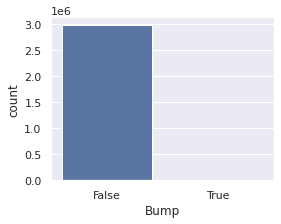

In [0]:
sns.countplot(x="Bump",data =df)
sns.set(rc={'figure.figsize':(4,3)})


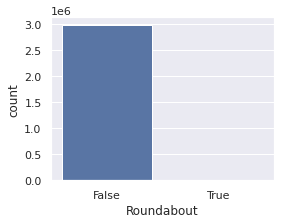

In [0]:
sns.countplot(x="Roundabout",data =df)
sns.set(rc={'figure.figsize':(4,3)})

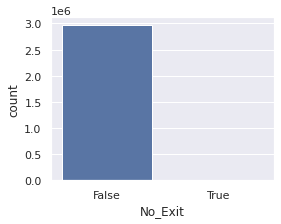

In [0]:
sns.countplot(x="No_Exit",data =df)
sns.set(rc={'figure.figsize':(4,3)})

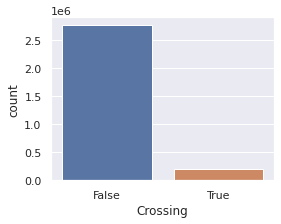

In [0]:
sns.countplot(x="Crossing",data =df)
sns.set(rc={'figure.figsize':(4,3)})

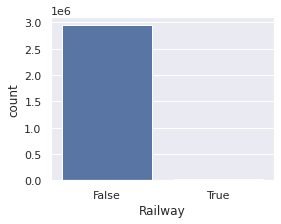

In [0]:
sns.countplot(x="Railway",data =df)
sns.set(rc={'figure.figsize':(4,3)})

The figures below indicate the each city has a different hourly accident pattern. Compared here are Los Angeles, Dallas and Houston. This can indirectly indicate the traffic pattern. Also a must info to take city level traffic/accident measures

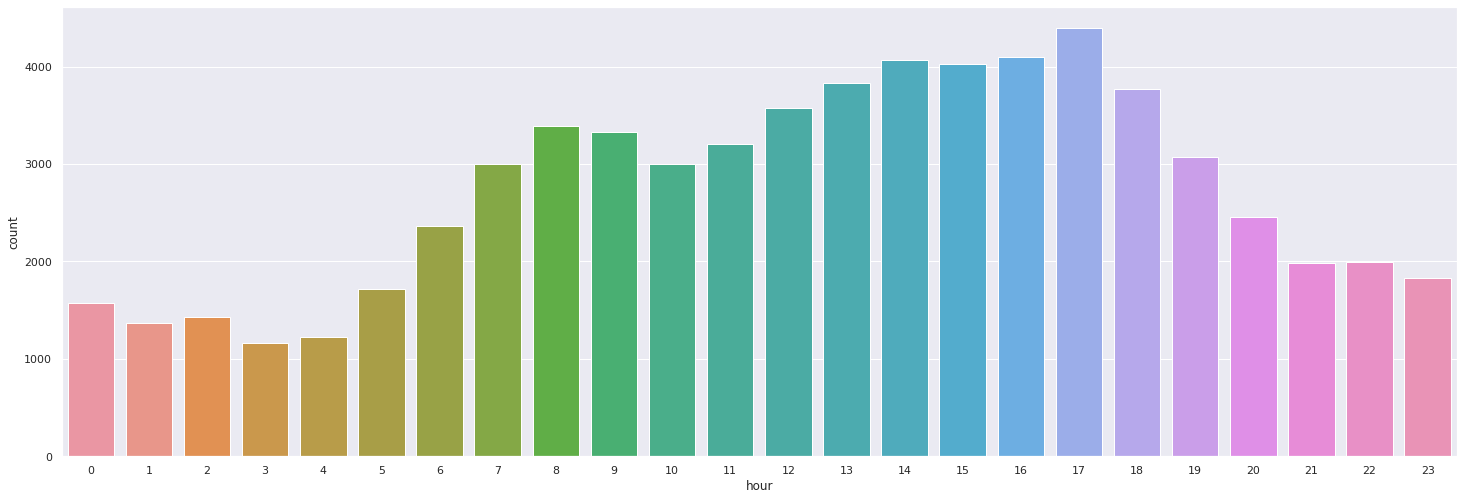

In [0]:
df_losangeles= df.loc[df.City == 'Los Angeles']
sns.countplot(x="hour",data =df_losangeles)


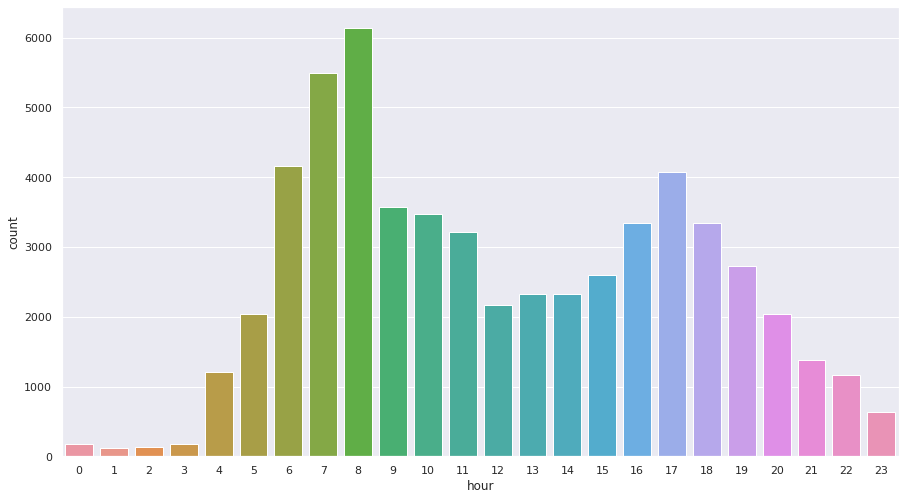

In [0]:
df_dallas= df.loc[df.City == 'Dallas']
sns.countplot(x="hour",data =df_dallas)

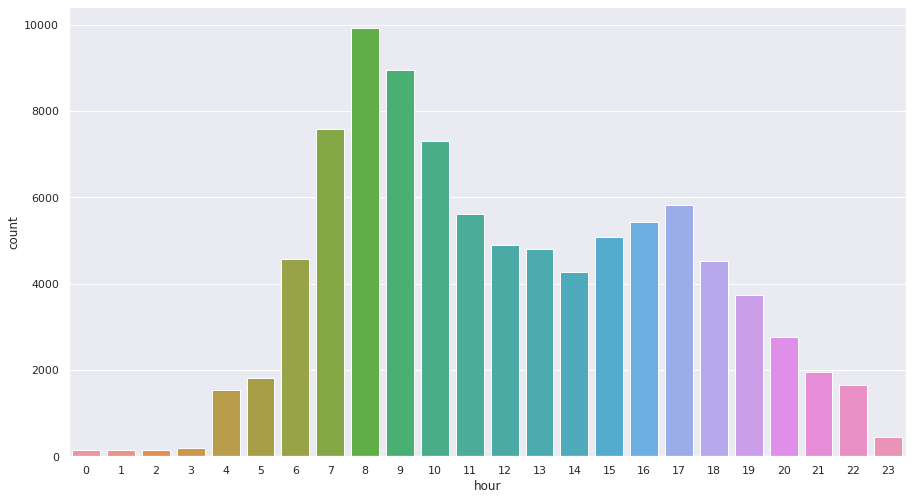

In [0]:
df_houston= df.loc[df.City == 'Houston']
sns.countplot(x="hour",data =df_houston)

The figure below shows the number of accients that occurred on different weather conditions. It was observed that most accidents occurred when it was clear weather. So there is no correlation between weather and number of accidents and their occurrence

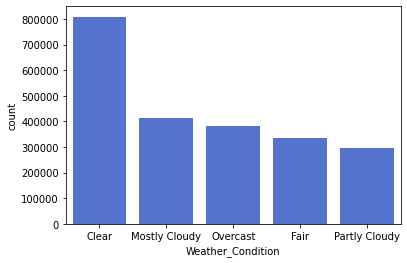

In [0]:
import seaborn as sns
sns.countplot(x="Weather_Condition",data =df, order=pd.value_counts(df['Weather_Condition']).iloc[:5].index, orient = "h",color='royalblue')
sns.set(rc={'figure.figsize':(25,8.27)})

In the figures below, there are two different representations of visibility in miles and the number of accidents. It was observed that most of the accidents, visibility was for 10 miles. So there was no correlation between visibility and number of accidents.

In [0]:
df_new2 = df
df_new2['count']=1
df_new3= df_new2[['Visibility(mi)','count']].groupby(['Visibility(mi)']).sum().reset_index().values.tolist()
df_new3=pd.DataFrame(df_new3)
df_new3

,0,1
0,0.00,800.0
1,0.06,40.0
2,0.10,1287.0
3,0.12,250.0
4,0.19,5.0
...,...,...
76,105.00,1.0
77,110.00,1.0
78,111.00,3.0
79,130.00,1.0


In [0]:
df_new3[df_new3[0]>5].sum

,0,1
38,5.5,24.0
39,6.0,50846.0
40,6.2,2.0
41,7.0,89763.0
42,8.0,62687.0
43,9.0,79123.0
44,10.0,2319794.0
45,10.5,26.0
46,11.0,148.0
47,12.0,330.0


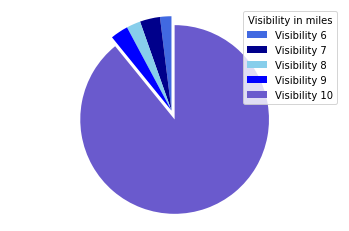

<Figure size 1440x1440 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt


labels = ['Visibility 6', 'Visibility 7', 'Visibility 8', 'Visibility 9','Visibility 10']
sizes = ['50846','89763','62687','79123','2319794']
color = ['royalblue','darkblue','skyblue','blue','slateblue']
explode = (0, 0, 0, 0,0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, 
        shadow=False, startangle=90,colors=color)
ax1.axis('equal') 
plt.legend(title="Visibility in miles", labels =labels)
plt.figure(figsize=(20,20)) 
plt.show()

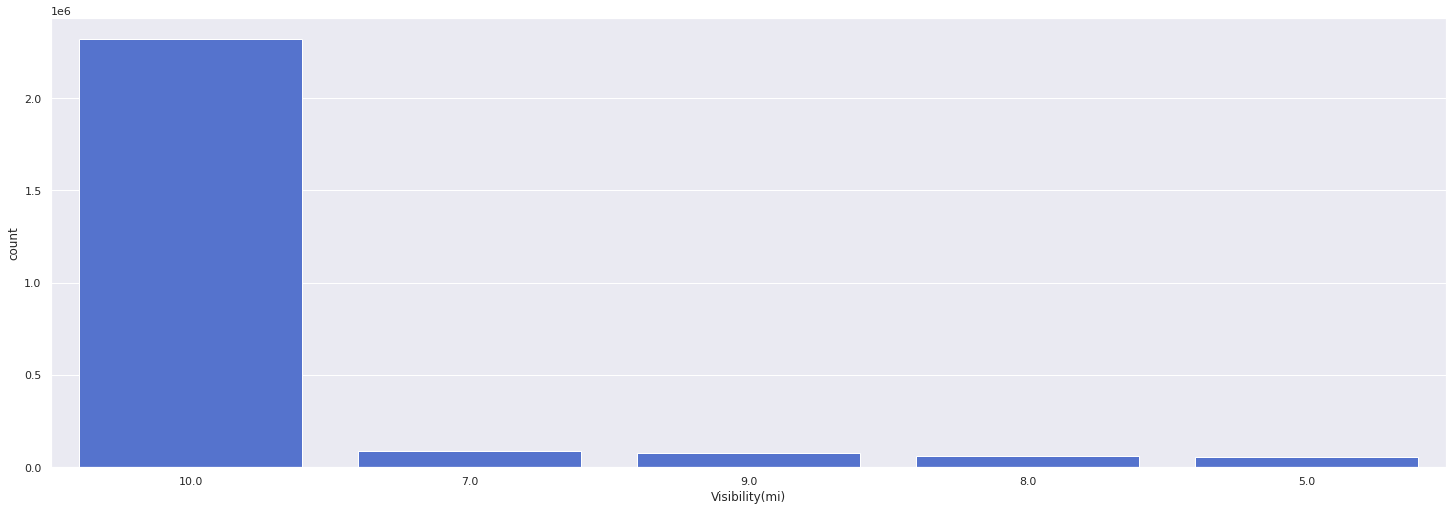

In [0]:
import seaborn as sns
sns.countplot(x="Visibility(mi)",data =df, order=pd.value_counts(df['Visibility(mi)']).iloc[:5].index,color='royalblue')
sns.set(rc={'figure.figsize':(15,8.27)})

The figure below indicates the most passed TMC code. Traffic Message Channel(TMC) is a message passed to motor vehicle drivers to pass info on accidnet and curret status. Here we see tat TMC 201 is the most passed TMC.

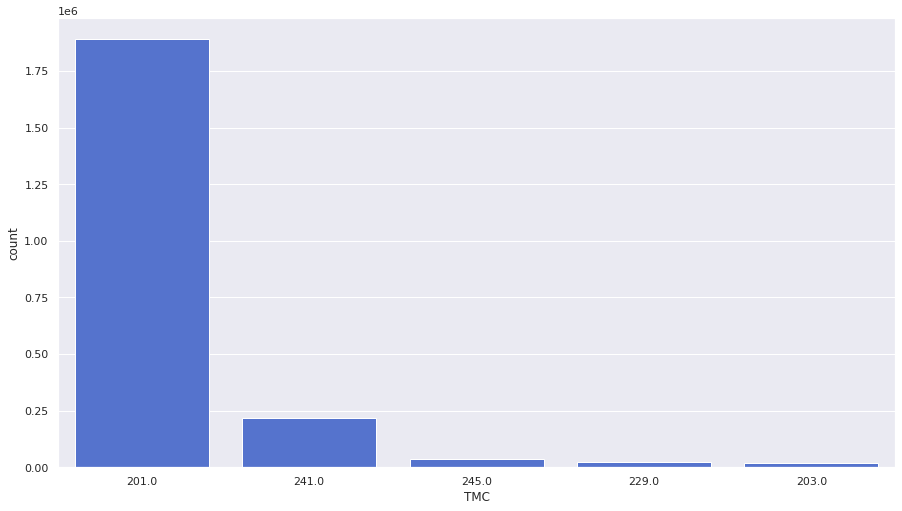

In [0]:
import seaborn as sns
sns.countplot(x="TMC",data =df, order=pd.value_counts(df['TMC']).iloc[:5].index,color='royalblue')
sns.set(rc={'figure.figsize':(6,8)})